In [1]:
import pandas as pd
import numpy as np
import cv2 as cv2

from numpy import array
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as im



In [2]:
x = pd.read_csv('./50signDataset/GT-00002.csv', sep='\;')
y = pd.read_csv('./30signDataset/GT-00001.csv', sep=';')
z = pd.read_csv('./30signDataset/GT-00001.csv', sep='')

x.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 8 columns):
Filename    2250 non-null object
Width       2250 non-null int64
Height      2250 non-null int64
Roi.X1      2250 non-null int64
Roi.Y1      2250 non-null int64
Roi.X2      2250 non-null int64
Roi.Y2      2250 non-null int64
ClassId     2250 non-null int64
dtypes: int64(7), object(1)
memory usage: 140.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 8 columns):
Filename    2220 non-null object
Width       2220 non-null int64
Height      2220 non-null int64
Roi.X1      2220 non-null int64
Roi.Y1      2220 non-null int64
Roi.X2      2220 non-null int64
Roi.Y2      2220 non-null int64
ClassId     2220 non-null int64
dtypes: int64(7), object(1)
memory usage: 138.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
nameOne = y.Filename
is30Sign = y.ClassId

nameTwo = x.Filename
is50Sign = x.ClassId

In [4]:
tabIThirty = np.zeros([2220,55*57])
tabClassIdThirty = np.zeros([2220,1])

for i in range(1,2220) :
    I=im.imread("30signDataset/" + nameOne[i])
    tabClassIdThirty[i] = is30Sign[i]
    
    IgrayOne=cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    IgrayOne=cv2.resize(IgrayOne,(57,55),interpolation = cv2.INTER_AREA)

    tabIThirty[i,:] = IgrayOne.reshape(IgrayOne.shape[0]*IgrayOne.shape[1])

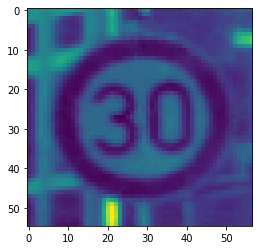

In [5]:
K=tabIThirty[1,:].reshape([55,57])
plt.imshow(K)

In [6]:
tabIFifty = np.zeros([2220,55*57])
tabClassIdFifty= np.zeros([2220,1])

for i in range(1,2220) :
    I=im.imread("50signDataset/" + nameTwo[i])
    tabClassIdFifty[i] = is50Sign[i]
    
    IgrayTwo=cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    IgrayTwo=cv2.resize(IgrayTwo,(57,55),interpolation = cv2.INTER_AREA)

    tabIFifty[i,:] = IgrayTwo.reshape(IgrayTwo.shape[0]*IgrayTwo.shape[1])

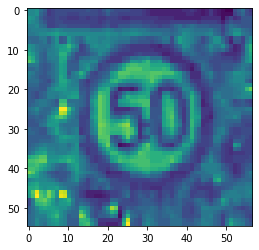

In [7]:
L=tabIFifty[1,:].reshape([55,57])
plt.imshow(L)

In [29]:
tabIThirty = pd.DataFrame(tabIThirty)
tabClassIdThirty = pd.DataFrame(tabClassIdThirty)

print(type(tabIThirty))
print(type(tabClassIdThirty))

final30SignTab = tabIThirty
#print(type(final30SignTab))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
tabIFifty = pd.DataFrame(tabIFifty)
tabClassIdFifty = pd.DataFrame(tabClassIdFifty)

print(tabIFifty.shape)
print(tabIThirty.shape)

final50SignTab = tabIFifty

finalClassIdTab = pd.concat([tabClassIdThirty,tabClassIdFifty])

print(final50SignTab.shape)
print(finalClassIdTab.shape)
#print(type(final50SignTab))

(2220, 3135)
(2220, 3135)
(2220, 3135)
(4440, 1)


In [31]:
finalTotalTab = pd.concat([final50SignTab,final30SignTab], ignore_index=True)
finalTotalTab.shape

(4440, 3135)

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(finalTotalTab, finalClassIdTab, test_size=0.35, random_state=42)

In [44]:
print(xtrain.shape)
print(ytrain.shape)
print('pourcentage:' ,xtrain.shape[0]/finalTotalTab.shape[0])

(2886, 3135)
(2886, 1)
pourcentage: 0.65


In [45]:
from sklearn.tree import DecisionTreeClassifier

Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20)

In [46]:
clf = Arbre_decision.fit(xtrain, ytrain)

In [47]:
from sklearn.metrics import accuracy_score

ypredit = clf.predict(xtest)
accuracy_score(ytest, ypredit)

0.9086229086229086

In [48]:
from sklearn import metrics

print(metrics.confusion_matrix(ytest, ypredit))

[[713  82]
 [ 60 699]]


In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
clf = KNN .fit(xtrain, ytrain)
ypredit = clf.predict(xtest)
accuracy_score(ytest, ypredit)
print(metrics.confusion_matrix(ytest, ypredit))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[721  74]
 [ 72 687]]
